In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# Загрузка данных (предварительно сохранённый CSV-файл)
data = pd.read_csv("Skyserver_12_30_2019 4_49_58 PM.csv")
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [4]:
# Вопросы 1–5: размерность, категориальные, бинарные и числовые признаки
data['is_bright'] = (data['r'] < 15).astype(int)           # яркие объекты
data['is_blue'] = ((data['u'] - data['g']) < 0.5).astype(int)  # голубой оттенок
data['is_near_zero_z'] = (data['redshift'] < 0.05).astype(int)  # близко к Земле
print(f"Объектов: {data.shape[0]}, Признаков: {data.shape[1]}")
cat_cols = data.select_dtypes(include='object').columns.tolist()
print("Категориальные признаки:", cat_cols)
print("Количество категориальных признаков:", len(cat_cols))
print("Столбец с макс. уникальными значениями:", data[cat_cols].nunique().idxmax())
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
print("Бинарные признаки:", binary_cols)
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Числовые признаки:", num_cols)

Объектов: 100000, Признаков: 21
Категориальные признаки: ['class']
Количество категориальных признаков: 1
Столбец с макс. уникальными значениями: class
Бинарные признаки: ['is_bright', 'is_blue', 'is_near_zero_z']
Числовые признаки: ['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'is_bright', 'is_blue', 'is_near_zero_z']


In [5]:
data['is_bright'] = (data['r'] < 15).astype(int)           # яркие объекты
data['is_blue'] = ((data['u'] - data['g']) < 0.5).astype(int)  # голубой оттенок
data['is_near_zero_z'] = (data['redshift'] < 0.05).astype(int)  # близко к Земле# Вопросы 6–8: пропуски
print("Пропуски по столбцам:\n", data.isnull().sum())
print("Объектов с пропусками:", data.isnull().any(axis=1).sum())
print("Столбец с макс. пропусками:", data.isnull().sum().idxmax())

Пропуски по столбцам:
 objid             0
ra                0
dec               0
u                 0
g                 0
r                 0
i                 0
z                 0
run               0
rerun             0
camcol            0
field             0
specobjid         0
class             0
redshift          0
plate             0
mjd               0
fiberid           0
is_bright         0
is_blue           0
is_near_zero_z    0
dtype: int64
Объектов с пропусками: 0
Столбец с макс. пропусками: objid


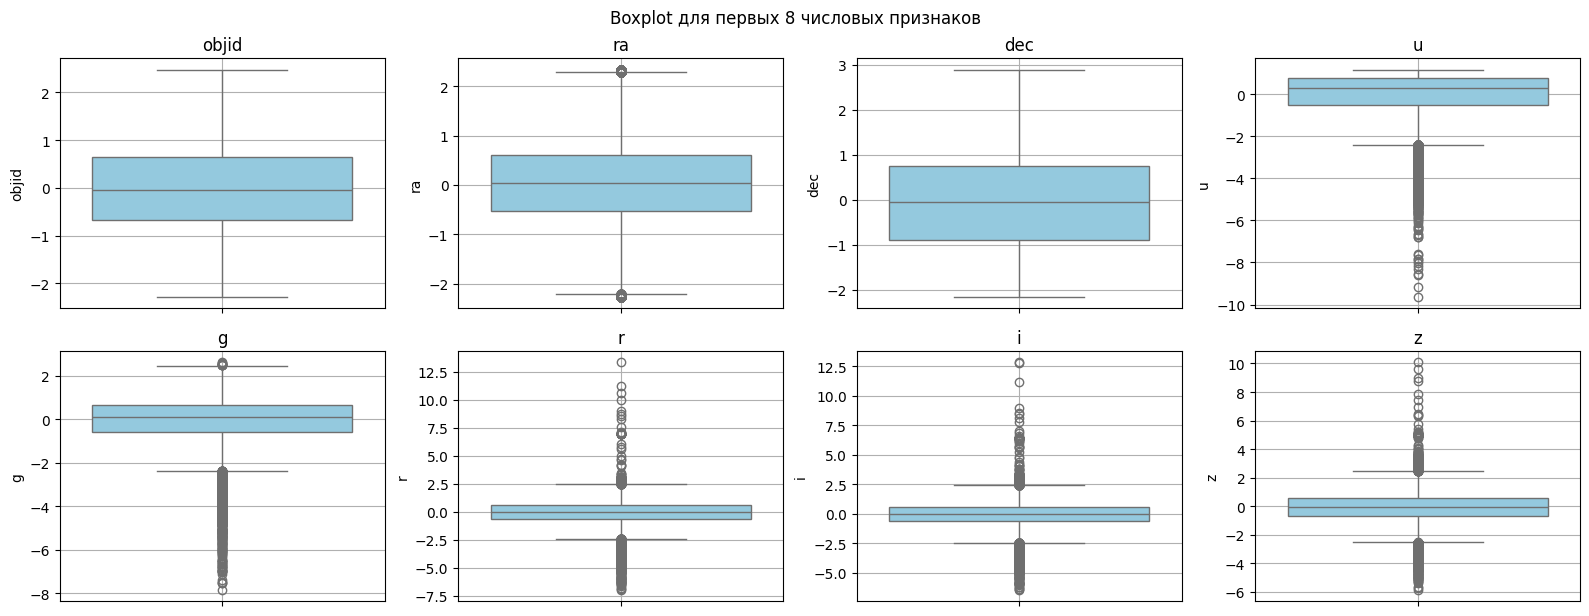

In [6]:
# Вопрос 9: выбросы
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols)
plt.figure(figsize=(16, 6))
for i, col in enumerate(num_cols[:8], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=scaled_df[col], color='skyblue')
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.suptitle("Boxplot для первых 8 числовых признаков", y=1.02)
plt.show()

In [7]:
# Вопрос 10: столбец с максимальным средним значением до/после нормализации
std_before = data[num_cols].std()
std_after = scaled_df.std()
print("До нормализации (наибольшее СКО):", std_before.idxmax())
print("После нормализации (наибольшее СКО):", std_after.idxmax())


До нормализации (наибольшее СКО): specobjid
После нормализации (наибольшее СКО): is_blue


In [8]:
# Вопросы 11–12: целевой признак и train/test split
X = data.drop(columns=['objid', 'specobjid', 'class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Тренировочная выборка:", X_train.shape[0])

Тренировочная выборка: 70000


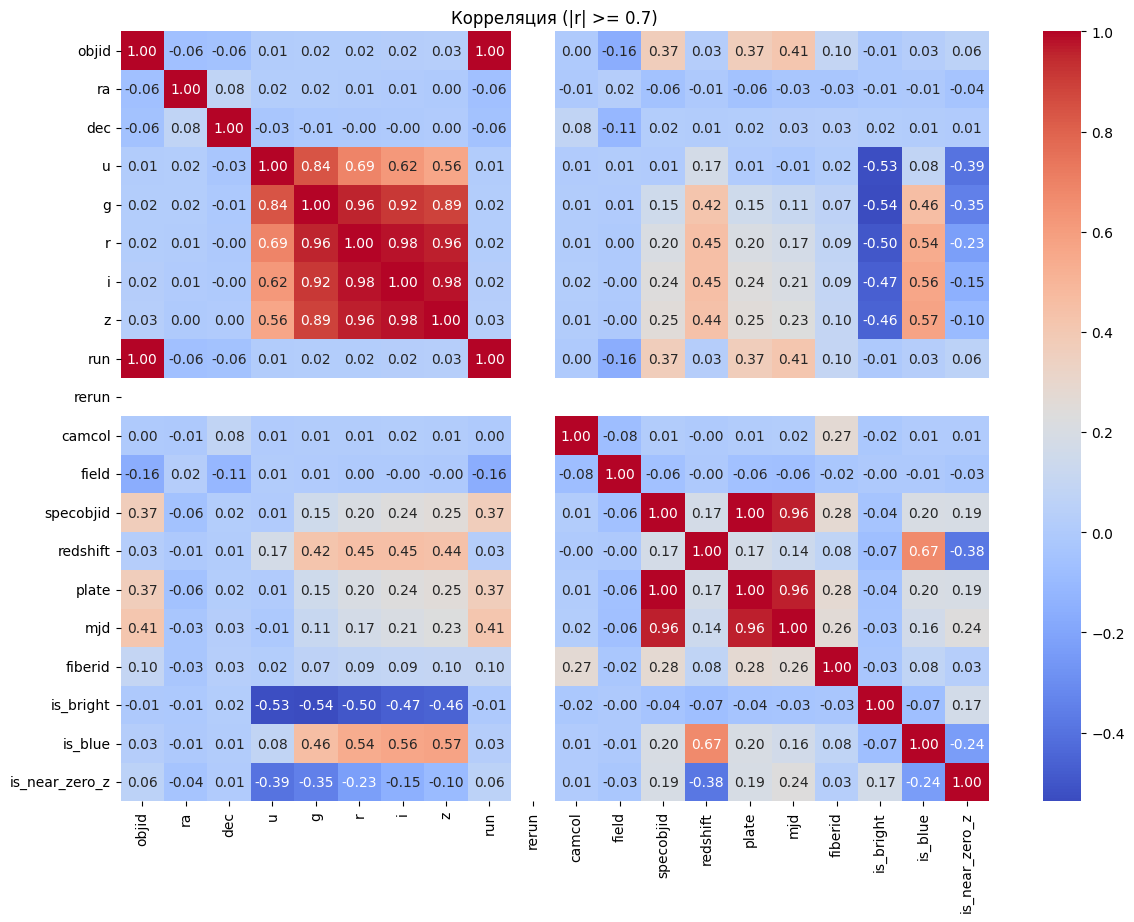

In [9]:
# Вопрос 13: корреляция между признаками
plt.figure(figsize=(14, 10))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция (|r| >= 0.7)")
plt.show()

Компонент для объяснения 90% дисперсии: 10
Признак с наибольшим вкладом в PC1: r


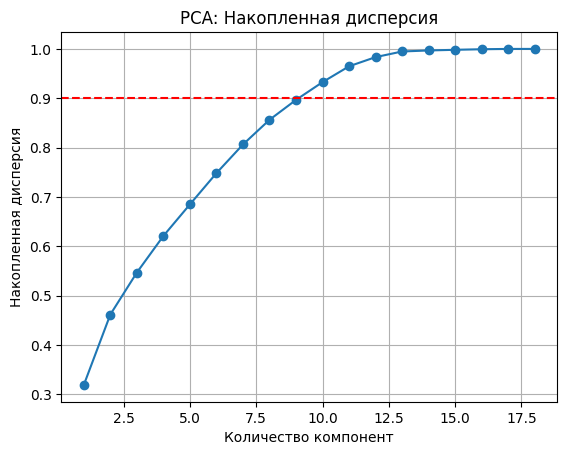

In [10]:
# Вопросы 14–15: PCA — объяснение 90% дисперсии и вклад в первую компоненту
X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=np.number))
pca = PCA()
pca.fit(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_var >= 0.9) + 1
print("Компонент для объяснения 90% дисперсии:", n_components_90)
components_df = pd.DataFrame(
    pca.components_,
    columns=X.select_dtypes(include=np.number).columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
first_pc = components_df.iloc[0].abs()
print("Признак с наибольшим вкладом в PC1:", first_pc.idxmax())
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная дисперсия")
plt.title("PCA: Накопленная дисперсия")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.088452
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.748489
[t-SNE] KL divergence after 1500 iterations: 1.196127


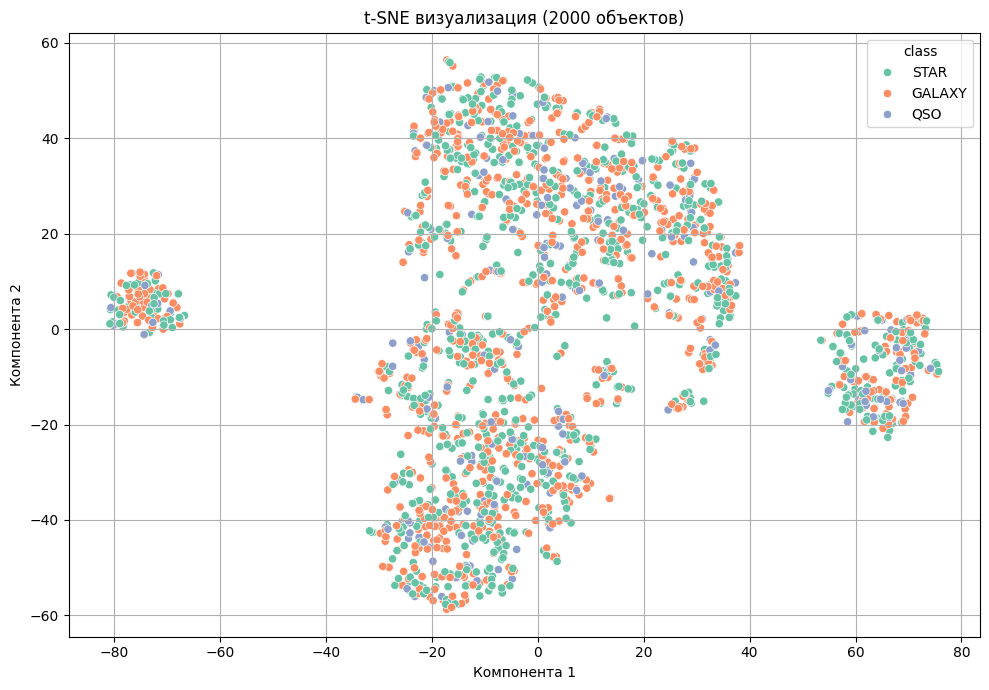

Визуально можно выделить 3 кластера.


In [11]:
# Вопрос 16: t-SNE визуализация
sample_size = 2000
X_sample = X_scaled[np.random.choice(len(X_scaled), sample_size, replace=False)]
y_sample = y.iloc[:sample_size]
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', n_iter=1500, random_state=42, verbose=1)
tsne_result = tsne.fit_transform(X_sample)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=y_sample, palette='Set2')
plt.title("t-SNE визуализация (2000 объектов)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.tight_layout()
plt.show()
print("Визуально можно выделить 3 кластера.")